In [18]:
from glob import glob
import os
import mne
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.io
import sys
import h5py
from scipy.signal import filtfilt
from scipy import stats
import scipy.fftpack as sf
from scipy import fftpack

In [3]:
mat=scipy.io.loadmat('EEG_raw.mat')

In [4]:
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Dec 13 19:56:37 2013', '__version__': '1.0', '__globals__': [], 'data': array([[-5.288e+00, -2.000e-02,  5.723e+00, ..., -1.123e+00, -1.094e+00,
        -1.040e+00],
       [ 7.212e+00, -5.942e+00, -1.792e+00, ..., -3.320e-01, -4.050e-01,
        -5.180e-01],
       [ 5.370e-01,  1.309e+00,  3.218e+00, ..., -2.000e-02,  1.000e-02,
         4.900e-02],
       ...,
       [ 6.963e+00, -5.684e+00,  3.452e+00, ..., -5.660e-01, -5.470e-01,
        -5.320e-01],
       [ 0.000e+00, -4.640e-01, -1.000e-02, ...,  4.880e-01,  4.880e-01,
         4.830e-01],
       [ 0.000e+00, -1.030e+00,  0.000e+00, ...,  1.000e-02,  5.000e-03,
         1.500e-02]])}


In [5]:
print(mat['data'])

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]


In [6]:
X=mat["data"]
print(X)
print(type(X))

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]
<class 'numpy.ndarray'>


In [7]:
X[0][1000]

-1.47

In [8]:
print(X.shape)

(49, 340000)


In [9]:
A=X[0]

In [10]:
A

array([-5.288, -0.02 ,  5.723, ..., -1.123, -1.094, -1.04 ])

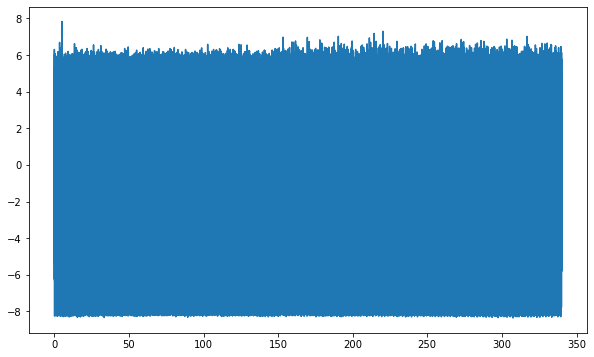

In [26]:
t=np.linspace(0,340,340000)
plt.figure(figsize=(10,6))
plt.plot(t,A)

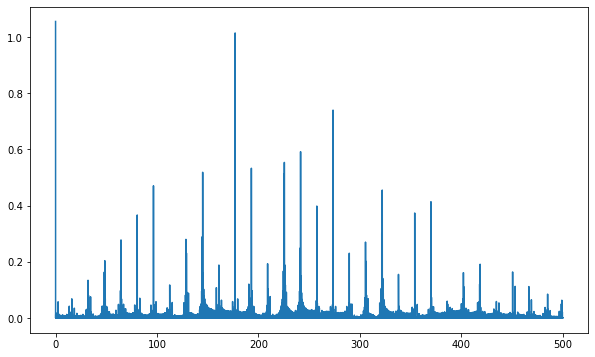

In [25]:
yf = fftpack.fft(A, t.size)
amp = np.abs(yf) # get amplitude spectrum 
freq = fftpack.fftfreq(t.size, 340/340000)
plt.figure(figsize=(10,6))
plt.plot(freq[0:freq.size//2], (2/amp.size)*amp[0:amp.size//2])
plt.show()

[1.10694552 2.1847539  3.18259294 ... 1.04556854 0.95469156 0.86487433]


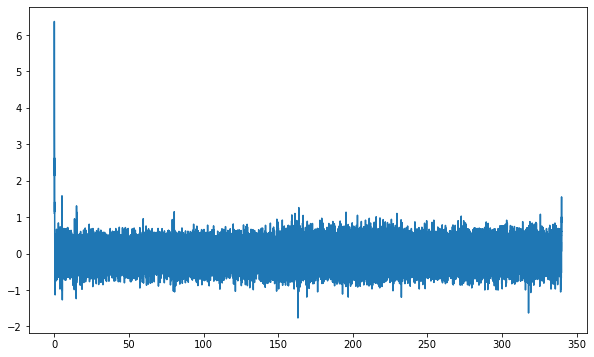

In [24]:
fs=1000
fl=1
fh=45
nyq=0.5*fs
l=fl/nyq
h=fh/nyq
order=2
b,a=scipy.signal.butter(order, [l,h], 'bandpass', analog=False)
y=scipy.signal.filtfilt(b,a,A,axis=0)
plt.figure(figsize=(10,6))
plt.plot(t,y)
print(y)

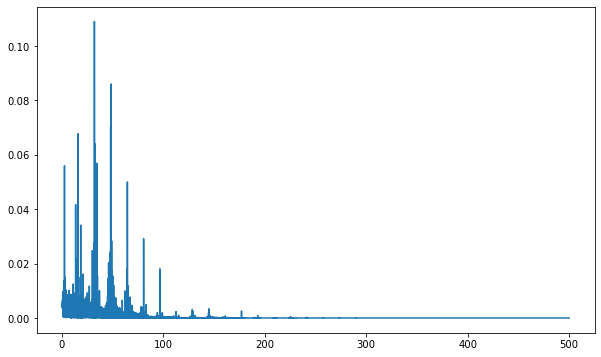

In [22]:
yf = fftpack.fft(y, t.size)
amp = np.abs(yf) # get amplitude spectrum 
freq = fftpack.fftfreq(t.size, 340/340000)
plt.figure(figsize=(10,6))
plt.plot(freq[0:freq.size//2], (2/amp.size)*amp[0:amp.size//2])
plt.show()

In [73]:
fs=1000
fl=1
fh=45
nyq=0.5*fs
l=fl/nyq
h=fh/nyq
order=2
b,a=scipy.signal.butter(order, [l,h], 'bandpass', analog=False)
BP=scipy.signal.filtfilt(b,a,X,axis=0)
print(BP)

[[-4.08459509  2.90301878  4.27150396 ... -0.54574124 -0.52111965
  -0.50726453]
 [-2.41096984  2.53778052  2.96191807 ... -0.3474209  -0.32941983
  -0.32492147]
 [-0.87046417  2.20177653  1.74047468 ... -0.16166079 -0.14987085
  -0.15405314]
 ...
 [-0.68487559  1.97972522  0.81474764 ... -0.15990839 -0.15972112
  -0.14163405]
 [-0.6740403   1.78136091  0.74403295 ... -0.13627389 -0.13321119
  -0.12073299]
 [-0.69513898  1.60305205  0.66517244 ... -0.11037323 -0.10431366
  -0.09797005]]


In [74]:
print(X)

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]


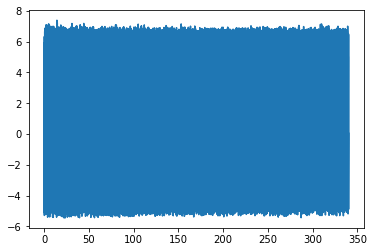

In [77]:
plt.plot(t,X[2])

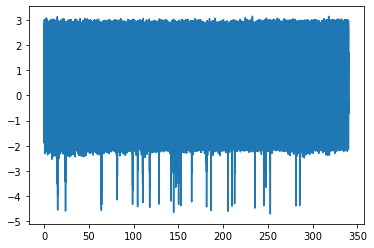

In [78]:
plt.plot(t,BP[2])